# SER LSTM Training Script

## Morgan Sandler (sandle20@msu.edu) - Michigan State University

TODO:
- train on the 256 dim embeddings (stored in var=embeddings)
- Correct the shape of the embeddings to train to (SIZE OF TRAIN, SIZE OF SPLIT SEGMENTS, 256)
- extract 3 second long overlapping windows

In [4]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
#from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_visible_devices(devices=gpus[1], device_type='GPU')
tf.config.experimental.set_memory_growth(device=gpus[1], enable=True)

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

## Load CREMA-D Dataset

In [ ]:
Crema = "/research/iprobe-sandle20/sandle20/CREMA-D/AudioWAV/"

In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []
file_subject = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    
    # part[0] refers to the subject number. start new list for this information
    file_subject.append(int(part[0]))
    
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

# dataframe for the subject numbers
subjects_df = pd.DataFrame(file_subject, columns=['Subject'])

Crema_df = pd.concat([emotion_df, path_df, subjects_df], axis=1)
Crema_df.head()

NameError: name 'Crema' is not defined

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(Crema_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## Visualization of signals

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

In [ ]:
emotion='sad'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Feature extraction (DeepTalk)

In [3]:
labels = {'disgust':0,'happy':1,'sad':2,'neutral':3,'fear':4,'angry':5}
Crema_df.replace({'Emotions':labels},inplace=True)

NameError: name 'Crema_df' is not defined

In [8]:
import demo_functions as dt_func

SAMPLE_RATE = 22050

data = {
        "subject": [],
        "labels": [],
        "dt": []
    }

from tqdm import tqdm

for i in tqdm(range(200)):#7442)):
    data['subject'].append(Crema_df.iloc[i,2])
    data['labels'].append(Crema_df.iloc[i,0])
    #signal, sample_rate = librosa.load(Crema_df.iloc[i,1], sr=SAMPLE_RATE)
    
    # Compute DeepTalk embeddings
    try:
        embeddings = dt_func.run_DeepTalk_demo(ref_audio_path=Crema_df.iloc[i, 1])
    except:
        continue
    #if embeddings. == None:
    #    continue
    #print(embeddings)    
    #embeddings = embeddings.T
    data["dt"].append(np.asarray(embeddings))
    if i%500==0:
        print(i)


TURNING OFF WARNINGS in tools/sigproc.py!!



  0%|          | 0/200 [00:00<?, ?it/s]

Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.9918367346938775
43920


  1%|          | 2/200 [00:06<14:52,  4.51s/it]

Total embeddings returned: 100
0
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.110204081632653
24480
Total embeddings returned: 12
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7850340136054421
39360



  2%|▏         | 3/200 [00:07<10:57,  3.34s/it]

Total embeddings returned: 79
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7850340136054421
39360



  2%|▏         | 4/200 [00:07<08:14,  2.52s/it]

Total embeddings returned: 79
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
3.0258503401360546
66720



  2%|▎         | 5/200 [00:09<07:06,  2.19s/it]

Total embeddings returned: 204
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.251700680272109
27600



  3%|▎         | 6/200 [00:09<05:13,  1.62s/it]

Total embeddings returned: 26
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.5251700680272107
55680



  4%|▎         | 7/200 [00:10<04:42,  1.46s/it]

Total embeddings returned: 154
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5564625850340137
34320



  4%|▍         | 8/200 [00:11<03:43,  1.17s/it]

Total embeddings returned: 57
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2299319727891156
27120



  4%|▍         | 9/200 [00:11<02:51,  1.11it/s]

Total embeddings returned: 24
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4149659863945578
31200



  5%|▌         | 10/200 [00:11<02:21,  1.34it/s]

Total embeddings returned: 42
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.2095238095238097
48720



  6%|▌         | 11/200 [00:12<02:29,  1.27it/s]

Total embeddings returned: 122
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.1006802721088436
46320



  6%|▌         | 12/200 [00:13<02:30,  1.25it/s]

Total embeddings returned: 111
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



  6%|▋         | 13/200 [00:13<02:15,  1.38it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4040816326530612
30960



  7%|▋         | 14/200 [00:14<01:55,  1.61it/s]

Total embeddings returned: 41
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5238095238095237
33600



  8%|▊         | 15/200 [00:14<01:45,  1.75it/s]

Total embeddings returned: 53
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7850340136054421
39360



  8%|▊         | 16/200 [00:15<01:47,  1.71it/s]

Total embeddings returned: 79
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3931972789115645
30720



  8%|▊         | 17/200 [00:15<01:35,  1.91it/s]

Total embeddings returned: 40
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.327891156462585
29280



  9%|▉         | 18/200 [00:16<01:25,  2.12it/s]

Total embeddings returned: 34
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7850340136054421
39360



 10%|▉         | 19/200 [00:16<01:33,  1.93it/s]

Total embeddings returned: 79
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.491156462585034
32880



 10%|█         | 20/200 [00:17<01:28,  2.04it/s]

Total embeddings returned: 50
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5346938775510204
33840



 10%|█         | 21/200 [00:17<01:26,  2.08it/s]

Total embeddings returned: 54
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.980952380952381
43680



 11%|█         | 22/200 [00:18<01:39,  1.80it/s]

Total embeddings returned: 99
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 12%|█▏        | 23/200 [00:18<01:37,  1.81it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6653061224489796
36720



 12%|█▏        | 24/200 [00:19<01:37,  1.81it/s]

Total embeddings returned: 67
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.895238095238095
63840



 12%|█▎        | 25/200 [00:20<02:16,  1.28it/s]

Total embeddings returned: 191
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.492517006802721
54960



 13%|█▎        | 26/200 [00:21<02:30,  1.16it/s]

Total embeddings returned: 150
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4802721088435373
32640



 14%|█▎        | 27/200 [00:22<02:07,  1.36it/s]

Total embeddings returned: 49
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.8068027210884354
39840



 14%|█▍        | 28/200 [00:22<02:02,  1.41it/s]

Total embeddings returned: 82
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.382312925170068
30480



 14%|█▍        | 29/200 [00:23<01:44,  1.64it/s]

Total embeddings returned: 39
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3496598639455781
29760



 15%|█▌        | 30/200 [00:23<01:29,  1.89it/s]

Total embeddings returned: 36
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3387755102040817
29520


 16%|█▌        | 32/200 [00:24<01:02,  2.69it/s]

Total embeddings returned: 35
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.0231292517006803
22560
Total embeddings returned: 3
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3496598639455781
29760



 16%|█▋        | 33/200 [00:24<01:00,  2.76it/s]

Total embeddings returned: 36
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 17%|█▋        | 34/200 [00:25<01:08,  2.43it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 18%|█▊        | 35/200 [00:25<01:13,  2.23it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.545578231292517
34080



 18%|█▊        | 36/200 [00:26<01:14,  2.21it/s]

Total embeddings returned: 55
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.0027210884353743
44160



 18%|█▊        | 37/200 [00:26<01:29,  1.82it/s]

Total embeddings returned: 101
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.1863945578231292
26160



 19%|█▉        | 38/200 [00:27<01:14,  2.17it/s]

Total embeddings returned: 19
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.273469387755102
28080



 20%|█▉        | 39/200 [00:27<01:06,  2.43it/s]

Total embeddings returned: 28
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3061224489795917
28800


 20%|██        | 41/200 [00:27<00:49,  3.24it/s]

Total embeddings returned: 31
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.9904761904761905
21840
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.0462585034013605
45120



 21%|██        | 42/200 [00:28<01:11,  2.22it/s]

Total embeddings returned: 106
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.708843537414966
37680



 22%|██▏       | 43/200 [00:29<01:16,  2.06it/s]

Total embeddings returned: 72
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7306122448979593
38160



 22%|██▏       | 44/200 [00:29<01:20,  1.95it/s]

Total embeddings returned: 74
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.763265306122449
38880



 22%|██▎       | 45/200 [00:30<01:23,  1.85it/s]

Total embeddings returned: 77
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.491156462585034
32880



 23%|██▎       | 46/200 [00:30<01:18,  1.97it/s]

Total embeddings returned: 50
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7850340136054421
39360



 24%|██▎       | 47/200 [00:31<01:22,  1.86it/s]

Total embeddings returned: 79
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7414965986394557
38400



 24%|██▍       | 48/200 [00:32<01:25,  1.77it/s]

Total embeddings returned: 75
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.024489795918367
44640



 24%|██▍       | 49/200 [00:32<01:34,  1.60it/s]

Total embeddings returned: 103
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7306122448979593
38160



 25%|██▌       | 50/200 [00:33<01:31,  1.63it/s]

Total embeddings returned: 74
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6217687074829932
35760



 26%|██▌       | 51/200 [00:33<01:28,  1.69it/s]

Total embeddings returned: 63
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5238095238095237
33600



 26%|██▌       | 52/200 [00:34<01:21,  1.81it/s]

Total embeddings returned: 53
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 26%|██▋       | 53/200 [00:34<01:20,  1.83it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6217687074829932
35760



 27%|██▋       | 54/200 [00:35<01:18,  1.87it/s]

Total embeddings returned: 63
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2299319727891156
27120



 28%|██▊       | 55/200 [00:35<01:06,  2.17it/s]

Total embeddings returned: 24
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7741496598639457
39120



 28%|██▊       | 56/200 [00:36<01:12,  1.99it/s]

Total embeddings returned: 78
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4258503401360545
31440



 28%|██▊       | 57/200 [00:36<01:09,  2.05it/s]

Total embeddings returned: 43
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5346938775510204
33840



 29%|██▉       | 58/200 [00:37<01:09,  2.04it/s]

Total embeddings returned: 54
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5673469387755101
34560



 30%|██▉       | 59/200 [00:37<01:10,  2.01it/s]

Total embeddings returned: 58
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.491156462585034
32880



 30%|███       | 60/200 [00:38<01:07,  2.07it/s]

Total embeddings returned: 50
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.763265306122449
38880



 30%|███       | 61/200 [00:38<01:12,  1.90it/s]

Total embeddings returned: 77
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3496598639455781
29760



 31%|███       | 62/200 [00:39<01:05,  2.10it/s]

Total embeddings returned: 36
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.708843537414966
37680



 32%|███▏      | 63/200 [00:39<01:10,  1.95it/s]

Total embeddings returned: 72
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 32%|███▏      | 64/200 [00:40<01:11,  1.90it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.926530612244898
42480



 32%|███▎      | 65/200 [00:41<01:20,  1.69it/s]

Total embeddings returned: 94
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.763265306122449
38880


 34%|███▎      | 67/200 [00:41<01:05,  2.04it/s]

Total embeddings returned: 77
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.0775510204081633
23760
Total embeddings returned: 9
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6108843537414965
35520



 34%|███▍      | 68/200 [00:42<01:06,  1.99it/s]

Total embeddings returned: 62
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4258503401360545
31440



 34%|███▍      | 69/200 [00:42<01:02,  2.11it/s]

Total embeddings returned: 43
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6979591836734693
37440



 35%|███▌      | 70/200 [00:43<01:06,  1.96it/s]

Total embeddings returned: 71
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4258503401360545
31440



 36%|███▌      | 71/200 [00:43<01:02,  2.07it/s]

Total embeddings returned: 43
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.2965986394557825
50640


 36%|███▋      | 73/200 [00:45<01:01,  2.07it/s]

Total embeddings returned: 131
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.0013605442176872
22080
Total embeddings returned: 1
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5020408163265306
33120


 38%|███▊      | 75/200 [00:45<00:46,  2.68it/s]

Total embeddings returned: 51
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.9142857142857143
20160
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.0789115646258503
45840



 38%|███▊      | 76/200 [00:46<01:03,  1.96it/s]

Total embeddings returned: 109
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7523809523809524
38640



 38%|███▊      | 77/200 [00:47<01:07,  1.82it/s]

Total embeddings returned: 76
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.980952380952381
43680


 40%|███▉      | 79/200 [00:48<00:57,  2.11it/s]

Total embeddings returned: 99
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.8163265306122449
18000
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.8612244897959183
41040



 40%|████      | 80/200 [00:48<01:04,  1.86it/s]

Total embeddings returned: 87
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.11156462585034
46560



 40%|████      | 81/200 [00:49<01:15,  1.57it/s]

Total embeddings returned: 112
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.9591836734693877
43200



 41%|████      | 82/200 [00:50<01:19,  1.48it/s]

Total embeddings returned: 97
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3605442176870748
30000


 42%|████▏     | 84/200 [00:50<00:51,  2.24it/s]

Total embeddings returned: 37
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.9142857142857143
20160
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7850340136054421
39360



 42%|████▎     | 85/200 [00:51<00:57,  1.99it/s]

Total embeddings returned: 79
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.926530612244898
42480



 43%|████▎     | 86/200 [00:52<01:10,  1.61it/s]

Total embeddings returned: 94
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2625850340136053
27840



 44%|████▎     | 87/200 [00:52<00:59,  1.90it/s]

Total embeddings returned: 27
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.5251700680272107
55680



 44%|████▍     | 88/200 [00:53<01:19,  1.41it/s]

Total embeddings returned: 154
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.122448979591837
46800



 44%|████▍     | 89/200 [00:54<01:24,  1.31it/s]

Total embeddings returned: 113
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7850340136054421
39360



 45%|████▌     | 90/200 [00:55<01:19,  1.38it/s]

Total embeddings returned: 79
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.1210884353741497
24720



 46%|████▌     | 91/200 [00:55<01:02,  1.75it/s]

Total embeddings returned: 13
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.469387755102041
32400



 46%|████▌     | 92/200 [00:56<00:58,  1.86it/s]

Total embeddings returned: 48
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6761904761904762
36960



 46%|████▋     | 93/200 [00:56<00:58,  1.82it/s]

Total embeddings returned: 69
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6870748299319729
37200



 47%|████▋     | 94/200 [00:57<00:59,  1.79it/s]

Total embeddings returned: 70
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.459863945578231
54240



 48%|████▊     | 95/200 [00:58<01:15,  1.39it/s]

Total embeddings returned: 147
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.1755102040816328
25920



 48%|████▊     | 96/200 [00:58<01:00,  1.73it/s]

Total embeddings returned: 18
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7523809523809524
38640



 48%|████▊     | 97/200 [00:59<01:01,  1.68it/s]

Total embeddings returned: 76
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.8938775510204082
41760



 49%|████▉     | 98/200 [00:59<01:04,  1.59it/s]

Total embeddings returned: 90
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6870748299319729
37200



 50%|████▉     | 99/200 [01:00<01:02,  1.62it/s]

Total embeddings returned: 70
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.3401360544217686
51600



 50%|█████     | 100/200 [01:01<01:13,  1.36it/s]

Total embeddings returned: 135
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3714285714285714
30240



 50%|█████     | 101/200 [01:01<01:02,  1.58it/s]

Total embeddings returned: 38
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.327891156462585
29280



 51%|█████     | 102/200 [01:02<00:53,  1.83it/s]

Total embeddings returned: 34
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6761904761904762
36960



 52%|█████▏    | 103/200 [01:02<00:53,  1.80it/s]

Total embeddings returned: 69
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3170068027210884
29040



 52%|█████▏    | 104/200 [01:03<00:47,  2.01it/s]

Total embeddings returned: 33
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5891156462585034
35040



 52%|█████▎    | 105/200 [01:03<00:47,  1.99it/s]

Total embeddings returned: 60
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.9047619047619047
42000



 53%|█████▎    | 106/200 [01:04<00:53,  1.74it/s]

Total embeddings returned: 91
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.9047619047619047
42000



 54%|█████▎    | 107/200 [01:05<00:57,  1.61it/s]

Total embeddings returned: 91
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4040816326530612
30960



 54%|█████▍    | 108/200 [01:05<00:51,  1.80it/s]

Total embeddings returned: 41
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2952380952380953
28560



 55%|█████▍    | 109/200 [01:05<00:44,  2.06it/s]

Total embeddings returned: 30
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.763265306122449
38880



 55%|█████▌    | 110/200 [01:06<00:47,  1.88it/s]

Total embeddings returned: 77
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.545578231292517
34080



 56%|█████▌    | 111/200 [01:06<00:46,  1.93it/s]

Total embeddings returned: 55
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.9156462585034013
42240



 56%|█████▌    | 112/200 [01:07<00:51,  1.70it/s]

Total embeddings returned: 93
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4258503401360545
31440



 56%|█████▋    | 113/200 [01:08<00:46,  1.87it/s]

Total embeddings returned: 43
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 57%|█████▋    | 114/200 [01:08<00:46,  1.85it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.9047619047619047
42000


 58%|█████▊    | 116/200 [01:09<00:37,  2.21it/s]

Total embeddings returned: 91
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.8598639455782313
18960
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.436734693877551
31680



 58%|█████▊    | 117/200 [01:09<00:38,  2.18it/s]

Total embeddings returned: 45
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2843537414965986
28320


 60%|█████▉    | 119/200 [01:10<00:26,  3.02it/s]

Total embeddings returned: 29
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.8707482993197279
19200
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.0027210884353743
44160



 60%|██████    | 120/200 [01:11<00:37,  2.13it/s]

Total embeddings returned: 101
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.2312925170068025
49200



 60%|██████    | 121/200 [01:12<00:48,  1.63it/s]

Total embeddings returned: 124
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.8068027210884354
39840



 61%|██████    | 122/200 [01:12<00:49,  1.59it/s]

Total embeddings returned: 82
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5782312925170068
34800



 62%|██████▏   | 123/200 [01:13<00:46,  1.66it/s]

Total embeddings returned: 59
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7959183673469388
39600


 62%|██████▎   | 125/200 [01:14<00:35,  2.11it/s]

Total embeddings returned: 81
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.9904761904761905
21840
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3931972789115645
30720



 63%|██████▎   | 126/200 [01:14<00:33,  2.23it/s]

Total embeddings returned: 40
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6653061224489796
36720



 64%|██████▎   | 127/200 [01:15<00:35,  2.08it/s]

Total embeddings returned: 67
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.469387755102041
32400



 64%|██████▍   | 128/200 [01:15<00:33,  2.14it/s]

Total embeddings returned: 48
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.110204081632653
24480



 64%|██████▍   | 129/200 [01:15<00:27,  2.57it/s]

Total embeddings returned: 12
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.0027210884353743
44160



 65%|██████▌   | 130/200 [01:16<00:35,  1.96it/s]

Total embeddings returned: 101
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6653061224489796
36720



 66%|██████▌   | 131/200 [01:17<00:37,  1.86it/s]

Total embeddings returned: 67
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.926530612244898
42480



 66%|██████▌   | 132/200 [01:17<00:41,  1.65it/s]

Total embeddings returned: 94
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2081632653061225
26640


 67%|██████▋   | 134/200 [01:18<00:25,  2.56it/s]

Total embeddings returned: 22
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.7292517006802721
16080
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 68%|██████▊   | 135/200 [01:18<00:28,  2.27it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5564625850340137
34320



 68%|██████▊   | 136/200 [01:19<00:29,  2.18it/s]

Total embeddings returned: 57
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 68%|██████▊   | 137/200 [01:19<00:30,  2.07it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.763265306122449
38880



 69%|██████▉   | 138/200 [01:20<00:33,  1.87it/s]

Total embeddings returned: 77
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4476190476190476
31920



 70%|██████▉   | 139/200 [01:21<00:30,  1.99it/s]

Total embeddings returned: 46
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5891156462585034
35040



 70%|███████   | 140/200 [01:21<00:30,  1.95it/s]

Total embeddings returned: 60
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.220408163265306
48960



 70%|███████   | 141/200 [01:22<00:37,  1.57it/s]

Total embeddings returned: 123
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.763265306122449
38880



 71%|███████   | 142/200 [01:23<00:36,  1.57it/s]

Total embeddings returned: 77
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5782312925170068
34800



 72%|███████▏  | 143/200 [01:23<00:34,  1.66it/s]

Total embeddings returned: 59
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7414965986394557
38400



 72%|███████▏  | 144/200 [01:24<00:34,  1.65it/s]

Total embeddings returned: 75
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.1755102040816328
25920



 72%|███████▎  | 145/200 [01:24<00:27,  2.00it/s]

Total embeddings returned: 18
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.8829931972789116
41520



 73%|███████▎  | 146/200 [01:25<00:30,  1.76it/s]

Total embeddings returned: 89
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.382312925170068
30480



 74%|███████▎  | 147/200 [01:25<00:27,  1.95it/s]

Total embeddings returned: 39
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.17687074829932
48000



 74%|███████▍  | 148/200 [01:26<00:32,  1.59it/s]

Total embeddings returned: 119
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.545578231292517
34080



 74%|███████▍  | 149/200 [01:27<00:29,  1.71it/s]

Total embeddings returned: 55
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2625850340136053
27840



 75%|███████▌  | 150/200 [01:27<00:25,  2.00it/s]

Total embeddings returned: 27
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.122448979591837
46800



 76%|███████▌  | 151/200 [01:28<00:30,  1.63it/s]

Total embeddings returned: 113
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.122448979591837
46800



 76%|███████▌  | 152/200 [01:29<00:32,  1.46it/s]

Total embeddings returned: 113
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.273469387755102
28080



 76%|███████▋  | 153/200 [01:29<00:27,  1.72it/s]

Total embeddings returned: 28
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.6340136054421768
58080



 77%|███████▋  | 154/200 [01:30<00:35,  1.30it/s]

Total embeddings returned: 165
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.654421768707483
36480



 78%|███████▊  | 155/200 [01:31<00:31,  1.41it/s]

Total embeddings returned: 66
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.8938775510204082
41760



 78%|███████▊  | 156/200 [01:31<00:31,  1.40it/s]

Total embeddings returned: 90
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2408163265306122
27360



 78%|███████▊  | 157/200 [01:32<00:25,  1.71it/s]

Total embeddings returned: 25
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6653061224489796
36720



 79%|███████▉  | 158/200 [01:32<00:24,  1.73it/s]

Total embeddings returned: 67
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.8081632653061224
61920



 80%|███████▉  | 159/200 [01:34<00:32,  1.25it/s]

Total embeddings returned: 182
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.0027210884353743
44160



 80%|████████  | 160/200 [01:34<00:31,  1.25it/s]

Total embeddings returned: 101
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6653061224489796
36720



 80%|████████  | 161/200 [01:35<00:28,  1.38it/s]

Total embeddings returned: 67
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.927891156462585
64560



 81%|████████  | 162/200 [01:36<00:35,  1.08it/s]

Total embeddings returned: 194
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4476190476190476
31920


 82%|████████▏ | 164/200 [01:37<00:21,  1.65it/s]

Total embeddings returned: 46
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.9142857142857143
20160
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.3061224489795917
28800



 82%|████████▎ | 165/200 [01:37<00:18,  1.92it/s]

Total embeddings returned: 31
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2081632653061225
26640


 84%|████████▎ | 167/200 [01:38<00:11,  2.88it/s]

Total embeddings returned: 22
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.9795918367346939
21600
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2299319727891156
27120



 84%|████████▍ | 168/200 [01:38<00:10,  2.92it/s]

Total embeddings returned: 24
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.9591836734693877
43200



 84%|████████▍ | 169/200 [01:39<00:17,  1.75it/s]

Total embeddings returned: 97
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.7414965986394557
38400


 86%|████████▌ | 171/200 [01:40<00:13,  2.13it/s]

Total embeddings returned: 75
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.8707482993197279
19200
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.068027210884354
45600



 86%|████████▌ | 172/200 [01:41<00:17,  1.62it/s]

Total embeddings returned: 108
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.0993197278911564
24240



 86%|████████▋ | 173/200 [01:41<00:13,  2.00it/s]

Total embeddings returned: 11
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.327891156462585
29280


 88%|████████▊ | 175/200 [01:42<00:09,  2.66it/s]

Total embeddings returned: 34
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
0.9687074829931973
21360
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.382312925170068
30480



 88%|████████▊ | 176/200 [01:42<00:09,  2.56it/s]

Total embeddings returned: 39
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 88%|████████▊ | 177/200 [01:43<00:10,  2.15it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.273469387755102
28080



 89%|████████▉ | 178/200 [01:43<00:09,  2.33it/s]

Total embeddings returned: 28
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.110204081632653
24480



 90%|████████▉ | 179/200 [01:43<00:07,  2.71it/s]

Total embeddings returned: 12
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.926530612244898
42480



 90%|█████████ | 180/200 [01:44<00:10,  1.94it/s]

Total embeddings returned: 94
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4040816326530612
30960



 90%|█████████ | 181/200 [01:45<00:09,  2.00it/s]

Total embeddings returned: 41
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.742857142857143
60480



 91%|█████████ | 182/200 [01:46<00:14,  1.27it/s]

Total embeddings returned: 175
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.817687074829932
40080



 92%|█████████▏| 183/200 [01:47<00:13,  1.28it/s]

Total embeddings returned: 83
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6435374149659865
36240



 92%|█████████▏| 184/200 [01:48<00:12,  1.28it/s]

Total embeddings returned: 65
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.8938775510204082
41760



 92%|█████████▎| 185/200 [01:48<00:11,  1.26it/s]

Total embeddings returned: 90
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.0462585034013605
45120



 93%|█████████▎| 186/200 [01:49<00:11,  1.19it/s]

Total embeddings returned: 106
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.4476190476190476
31920



 94%|█████████▎| 187/200 [01:50<00:09,  1.36it/s]

Total embeddings returned: 46
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.1442176870748297
47280



 94%|█████████▍| 188/200 [01:51<00:09,  1.22it/s]

Total embeddings returned: 115
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2299319727891156
27120



 94%|█████████▍| 189/200 [01:51<00:07,  1.50it/s]

Total embeddings returned: 24
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.708843537414966
37680



 95%|█████████▌| 190/200 [01:52<00:06,  1.48it/s]

Total embeddings returned: 72
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6870748299319729
37200



 96%|█████████▌| 191/200 [01:53<00:06,  1.47it/s]

Total embeddings returned: 70
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
2.2421768707482994
49440



 96%|█████████▌| 192/200 [01:54<00:06,  1.24it/s]

Total embeddings returned: 125
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.763265306122449
38880



 96%|█████████▋| 193/200 [01:54<00:05,  1.28it/s]

Total embeddings returned: 77
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5238095238095237
33600



 97%|█████████▋| 194/200 [01:55<00:04,  1.41it/s]

Total embeddings returned: 53
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5346938775510204
33840



 98%|█████████▊| 195/200 [01:56<00:03,  1.51it/s]

Total embeddings returned: 54
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.0993197278911564
24240



 98%|█████████▊| 196/200 [01:56<00:02,  1.87it/s]

Total embeddings returned: 11
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.654421768707483
36480



 98%|█████████▊| 197/200 [01:56<00:01,  1.81it/s]

Total embeddings returned: 66
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.5782312925170068
34800



 99%|█████████▉| 198/200 [01:57<00:01,  1.83it/s]

Total embeddings returned: 59
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.2081632653061225
26640



100%|█████████▉| 199/200 [01:57<00:00,  2.17it/s]

Total embeddings returned: 22
Loaded encoder "model_GST.pt" trained to step 630501
Found synthesizer "model_GST" trained to step 558000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at trained_models/Generic/Vocoder/model_GST/model_GST.pt
---------------------------------------------------------------
Stage 1/3: Encoder
---------------------------------------------------------------
1.6
35280


100%|██████████| 200/200 [01:58<00:00,  1.69it/s]

Total embeddings returned: 61


In [9]:
X = np.asarray(data['dt'])
X_sub = np.asarray(data['subject'])
y = np.asarray(data["labels"])

X.shape

(188,)

In [10]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype='float32')
X.shape

(188, 204, 256)

In [11]:
# Subject disjointness between train/validation/test

possible_subjects = list(range(1001, 1092))

TRAIN_SIZE = 0.7 # Training sample of the data
TEST_SIZE = 0.1 # Used for final testing of performance for extra rigor
VALIDATION_SIZE = 0.2 # Used in the training of the model for validation data

# Determine which subjects belong to which set
X_train_subs, X_test_subs = train_test_split(possible_subjects, test_size=TEST_SIZE)
X_train_subs, X_val_subs = train_test_split(X_train_subs, test_size=VALIDATION_SIZE)

# There are now 3 sets of subjects X_train_subs | X_test_subs | X_val_subs


In [12]:
X_train = []
y_train = []
X_test = []
y_test = []
X_validation = []
y_validation = []

for i in range(X.shape[0]):#7371):
    if data['subject'][i] in X_train_subs:
        X_train.append(X[i])
        y_train.append(y[i])
    elif data['subject'][i] in X_test_subs:
        X_test.append(X[i])
        y_test.append(y[i])
    elif data['subject'][i] in X_val_subs:
        X_validation.append(X[i])
        y_validation.append(y[i])


In [13]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_validation = np.asarray(X_validation)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
y_validation = np.asarray(y_validation)


In [14]:
print(X_train.shape,y_train.shape,X_validation.shape,y_validation.shape,X_test.shape,y_test.shape)

(133, 204, 256) (133,) (38, 204, 256) (38,) (17, 204, 256) (17,)


## Build the keras model

In [15]:
def build_model(input_shape):
    model = tf.keras.Sequential()
    
    # Layer of LSTM
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(64))
    
    model.add(Dense(64, activation='relu'))
    
    # Dropout layer to combat overfitting
    model.add(Dropout(0.3))

    # Softmax function to convert to probabilities for six emotional classes
    model.add(Dense(6, activation='softmax'))

    return model

In [1]:
from model import MACNN

ImportError: cannot import name 'pywrap_tensorflow'

In [16]:
# create network
input_shape = (None, 256)
model = build_model(input_shape)

# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy', # TODO: Try another loss function???
                  metrics=['accuracy'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 128)         197120    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 251,078
Trainable params: 251,078
Non-trainable params: 0
________________________________________________________________

## Training Model

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, min_delta=0.01)
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=10, epochs=100, callbacks=[callback])

Train on 133 samples, validate on 38 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
133/133 [==============================] - 10s 79ms/sample - loss: 1.7998 - acc: 0.1053 - val_loss: 1.7968 - val_acc: 0.1842
Epoch 2/100
133/133 [==============================] - 8s 63ms/sample - loss: 1.7861 - acc: 0.1880 - val_loss: 1.7978 - val_acc: 0.0789
Epoch 3/100
133/133 [==============================] - 9s 66ms/sample - loss: 1.7548 - acc: 0.2932 - val_loss: 1.7981 - val_acc: 0.1579
Epoch 4/100
133/133 [==============================] - 9s 66ms/sample - loss: 1.7182 - acc: 0.2331 - val_loss: 1.8412 - val_acc: 0.1316
Epoch 5/100
133/133 [==============================] - 8s 64ms/sample - loss: 1.6533 - acc: 0.3308 - val_loss: 1.8560 - val_acc: 0.1579
Epoch 6/100
133/133 [==============================] - 8s 63ms/sample - loss: 1.6376 - acc: 0.3383 - val_loss: 1.9665 - val_acc: 0.2368
Epoch 7/100
133/133 [=======================

KeyboardInterrupt: 

## Evaluation of trained model

In [ ]:
#import keras
#model = keras.models.load_model('./Speech-Emotion-Recognition-Model-.h5')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: ", test_acc)

In [ ]:
test_val_loss, test_val_acc = model.evaluate(X_validation, y_validation, verbose=0)
print("Test Val Accuracy: ", test_val_acc)

In [27]:
model.save('Speech-Emotion-Recognition-Model-DeepTalk-LSTM-Allsamples.h5')

## Confusion Matrix and Analytics

In [22]:
#import keras
#model = keras.models.load_model('Models/Speech-Emotion-Recognition-Model-subjectdisjoint-133.h5')

In [23]:
model.evaluate(X_test, y_test, verbose=0)

[7.922531671421503, 0.15322581]

In [24]:
y_predicted = model.predict(X_test)

In [25]:
matrix = confusion_matrix(y_test, y_predicted.argmax(axis=1))

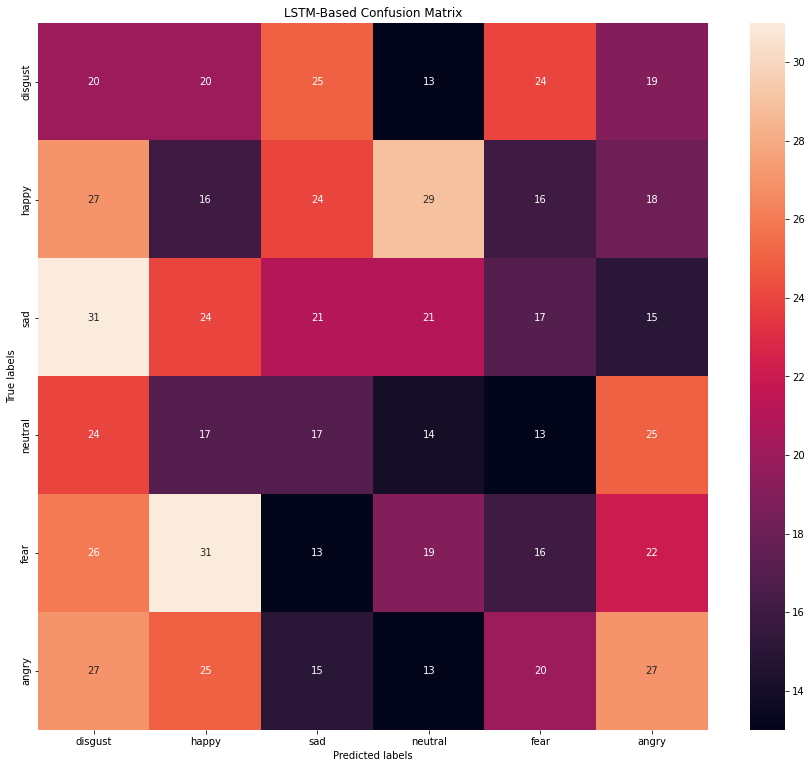

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt     

plt.figure(figsize=(15,13))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('LSTM-Based Confusion Matrix'); 
ax.xaxis.set_ticklabels(['disgust','happy','sad','neutral','fear','angry']); ax.yaxis.set_ticklabels(['disgust','happy','sad','neutral','fear','angry']);